In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go

# First neuron

(100, 2)
(100, 1)


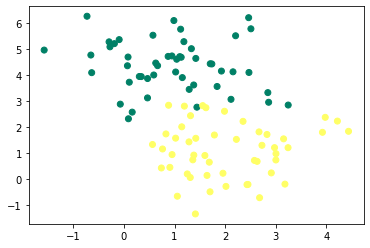

In [2]:
X,y = make_blobs(n_samples=100, n_features=2, random_state=0, centers=2)
y = y.reshape(y.shape[0],1)
print(X.shape)
print(y.shape)
plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

In [3]:
def initialisation(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.rand(1)
    return W,b

In [4]:
def model(X,W,b):
    z = X.dot(W) + b
    a = 1 / (1 + np.exp(-z))
    return a

In [5]:
def log_loss(a,y):
    return (-1 / len(y)) * np.sum( y * np.log(a) + (1-y) * np.log(1-a) )

In [6]:
def gradients(a,X,y):
    dW = (1/len(y)) * np.dot(X.T, (a-y))
    db = (1/len(y)) * np.sum(a-y)
    return (dW,db)

In [7]:
def update(dW,db,W,b,learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W,b)

In [8]:
def predict(X,W,b):
    A = model(X,W,b)
    # print(A)
    return (A>=0.5).astype(int)

In [9]:
def gradient_descent(X,y,learning_rate=0.1,n_iters=100):
    W,b = initialisation(X)
    loss = []
    for i in range(n_iters):
        a = model(X,W,b)
        loss.append(log_loss(a,y))
        dW,db = gradients(a,X,y)
        W,b = update(dW,db,W,b,learning_rate)
        
    y_pred = predict(X,W,b)
    print(y.shape)
    print(y_pred.shape)
    
    print(accuracy_score(y,y_pred))
        
    plt.plot(loss)
    plt.show()    
    
    return (W,b)

(100, 1)
(100, 1)
0.9


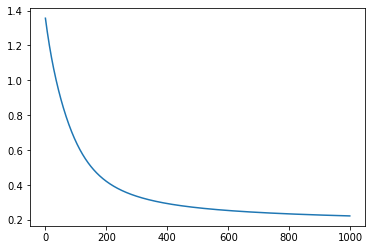

In [10]:
W,b = gradient_descent(X,y,0.01,1000)

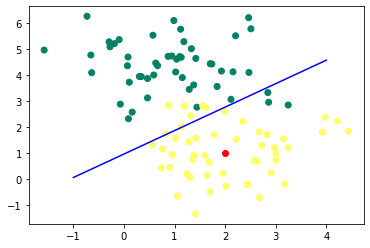

In [11]:
from numpy import linspace


new_plant = np.array([2,1])

x0 = np.linspace(-1,4,100)
x1 = ( -W[0] * x0 - b ) / W[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0,x1,c='b')
plt.show()

In [12]:
predict(new_plant,W,b)

array([1])

In [13]:
fig = go.Figure(data=[go.Scatter3d(
    x=X[:,0].flatten(),
    y=X[:,1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),
        colorscale='YlGn',
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template="plotly_dark", margin=dict(l=0,r=0,b=0,t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [14]:
X0 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
X1 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
xx0,xx1 = np.meshgrid(X0, X1)
Z = xx0 * W[0] + xx1 * W[1] + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity=0.7, reversescale=True)]))
fig.add_scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=y.flatten(),
    mode='markers',
    marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity=0.9, reversescale=True)
)

fig.update_layout(template='plotly_dark', margin=dict(l=0,r=0,b=0,t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

# Cat vs Dog exercise

In [15]:
%pip install h5py
from utilities import *

Note: you may need to restart the kernel to use updated packages.


In [16]:
X_train, y_train, X_test, y_test = load_data()

In [17]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\text.py:1223: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



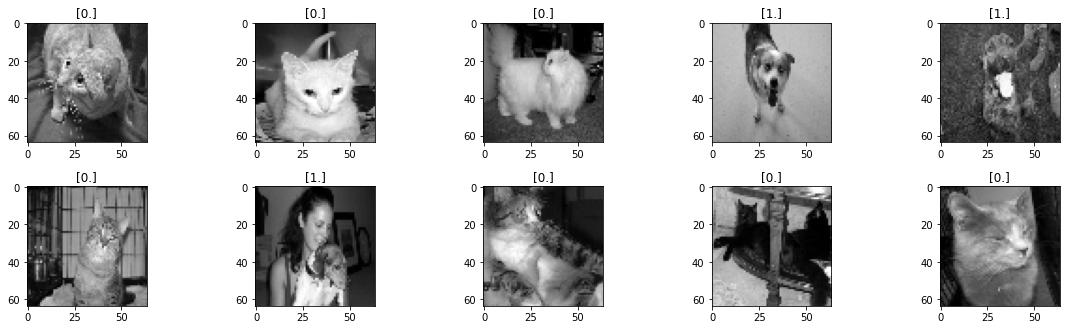

In [18]:
plt.figure(figsize=(16,9))
for i in range(1,11):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [19]:
# Démarche à suivre
# 1. Normaliser le train_set et le test_set (1-255 -> 0-1)
# 2. flatten() les variables du train_set et du test_set (64x64 -> 4096)
# 3. Entraîner le modèle sur le train_set (tracer la courbe d'apprentissage, trouvers les bons hyper-params)
# (Si vous rencontrez un problème avec la fonction log_loss, utiliser la fonction de sklearn à la place)
# 4. Evaluer le modèle sur le test_set (tracer également la courbe de Loss pour le test_set)

## 1. Normaliser le train_set et le test_set (1-255 -> 0-1)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
X_train_norm = np.array([scaler.fit_transform(x) for x in X_train])
X_test_norm = np.array([scaler.fit_transform(x) for x in X_test])
print(X_train_norm.shape)
print(X_test_norm.shape)
X_train_norm[0].min(), X_train_norm[0].max()

(1000, 64, 64)
(200, 64, 64)


(0.0, 1.0000000000000002)

## 2. flatten() les variables du train_set et du test_set (64x64 -> 4096)

In [54]:
X_train_flat = np.array([x.flatten() for x in X_train_norm])
X_test_flat = np.array([x.flatten() for x in X_test_norm])

In [55]:
print(X_train_flat.shape)
print(X_test_flat.shape)

(1000, 4096)
(200, 4096)


## 3. Entraîner le modèle sur le train_set (tracer la courbe d'apprentissage, trouvers les bons hyper-params)

C:\Users\louis\AppData\Local\Temp\ipykernel_4456\2863054611.py:2: RuntimeWarning:

divide by zero encountered in log

C:\Users\louis\AppData\Local\Temp\ipykernel_4456\2863054611.py:2: RuntimeWarning:

invalid value encountered in multiply



(1000, 1)
(1000, 1)
0.532


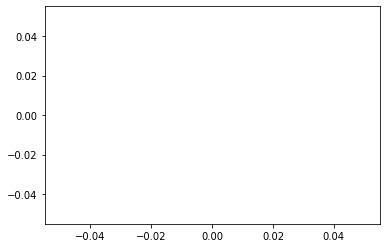

In [56]:
W,b = gradient_descent(X_train_flat,y_train,0.01,1000)

## (Si vous rencontrez un problème avec la fonction log_loss, utiliser la fonction de sklearn à la place)

In [58]:
from sklearn.metrics import log_loss as LL

In [65]:
def log_loss(a,y):
    return LL(y,a)

(1000, 1)
(1000, 1)
0.886


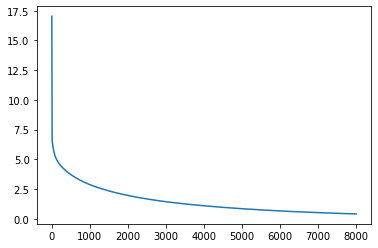

In [189]:
W,b = gradient_descent(X_train_flat,y_train,0.02,8000)

## 4. Evaluer le modèle sur le test_set (tracer également la courbe de Loss pour le test_set)

In [190]:
y_test_pred = predict(X_test_flat, W, b)

In [191]:
Loss_test = LL(y_test, y_test_pred)
Loss_test

16.92418434091518

In [192]:
accuracy_score(y_test,y_test_pred)

0.51